Que. 5

In the following dataset you have given SAT score and GPA of students. You have to predict GPA of students by using SAT score.
Build a Linear Regression Model and Calculate different errors to evaluate the model.

Use Polynomial Regression.

Dataset : SAT-GPA.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SAT-GPA.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [6]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


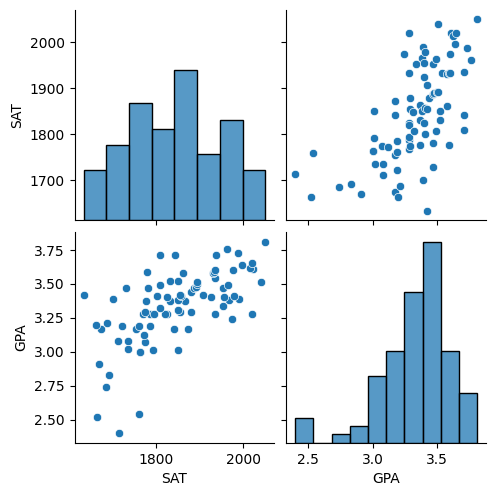

In [8]:
sns.pairplot(df)

In [10]:
df_new = df.sort_values('SAT')

In [11]:
x = df_new['SAT']
y = df_new['GPA']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x = pd.DataFrame(x)
poly.fit(x)
x_new = poly.transform(x)


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new,y,train_size=0.7,random_state=12345)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_true = y_test
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"mae = {mae}")
print(f"mse = {mse}")
print(f"rmse = {rmse}")
print(f"r2 = {r2}")

mae = 0.11844310146267878
mse = 0.025846581833850982
rmse = 0.16076872156564218
r2 = 0.47432789819834953


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(x_test)

new_component = pca.transform(x_test)

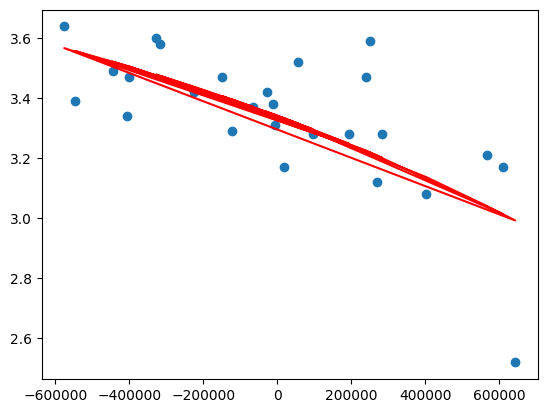

In [26]:
plt.scatter(new_component, y_test)
plt.plot(new_component, y_pred, color="red")